In [ ]:
# Install Pandas Datareader
# !pip install pandas-datareader


In [659]:
import pandas_datareader as pdr
import pandas as pd 
import datetime
from datetime import datetime,timedelta

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from pmdarima.arima.utils import ndiffs
from pmdarima import auto_arima



In [570]:
df = pdr.get_data_yahoo('TSLA')

In [571]:
df_twitter = pdr.get_data_yahoo('TWTR')

In [572]:
df_DogeCoin = pdr.get_data_yahoo('DOGE-USD')

In [573]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-17,65.419998,62.689999,65.108002,63.914001,49384500.0,63.914001
2017-07-18,65.825996,63.132000,63.500000,65.648003,31868500.0,65.648003
2017-07-19,66.330002,64.643997,65.646004,65.052002,31785000.0,65.052002
2017-07-20,66.043999,64.839996,65.379997,65.984001,25831000.0,65.984001
2017-07-21,66.251999,65.160004,65.891998,65.680000,24508000.0,65.680000
...,...,...,...,...,...,...
2022-07-11,759.190002,700.880005,756.309998,703.030029,33080400.0,703.030029
2022-07-12,719.320007,685.109985,710.539978,699.210022,29310300.0,699.210022
2022-07-13,726.179993,675.099976,676.500000,711.119995,32651500.0,711.119995


<AxesSubplot:xlabel='Date'>

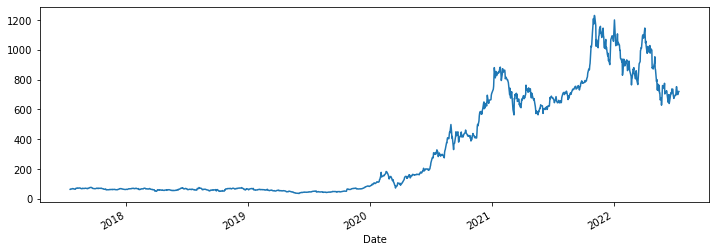

In [574]:
df['Adj Close'].plot(figsize=(12,4))

<AxesSubplot:xlabel='Date'>

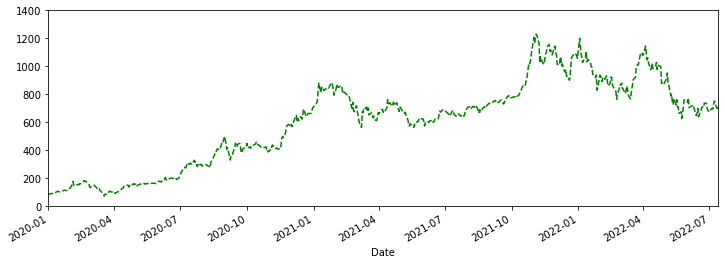

In [575]:
#xlimit and ylimit and coloring 
df['Adj Close'].plot(xlim=['2020-01-01','2022-07-13'],ylim=[0,1400],figsize=(12,4),ls='--',c='green')

In [581]:
index=df.loc['2020-01-01':'2022-07-13'].index
share_adj_close=df.loc['2020-01-01':'2022-07-13']['Adj Close']
share_adj_close

Date
2020-01-02     86.052002
2020-01-03     88.601997
2020-01-06     90.307999
2020-01-07     93.811996
2020-01-08     98.428001
                 ...    
2022-07-07    733.630005
2022-07-08    752.289978
2022-07-11    703.030029
2022-07-12    699.210022
2022-07-13    711.119995
Name: Adj Close, Length: 637, dtype: float64

In [577]:
index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2022-06-29', '2022-06-30', '2022-07-01', '2022-07-05',
               '2022-07-06', '2022-07-07', '2022-07-08', '2022-07-11',
               '2022-07-12', '2022-07-13'],
              dtype='datetime64[ns]', name='Date', length=637, freq=None)

In [578]:
import matplotlib.pyplot as plt
%matplotlib inline

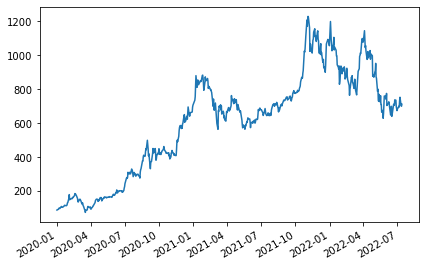

In [582]:

fig,ax=plt.subplots()
plt.tight_layout()
#preventing overlaping
fig.autofmt_xdate()
ax.plot(index,share_adj_close)

# time resampling 

In [583]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-17,65.419998,62.689999,65.108002,63.914001,49384500.0,63.914001
2017-07-18,65.825996,63.132000,63.500000,65.648003,31868500.0,65.648003
2017-07-19,66.330002,64.643997,65.646004,65.052002,31785000.0,65.052002
2017-07-20,66.043999,64.839996,65.379997,65.984001,25831000.0,65.984001
2017-07-21,66.251999,65.160004,65.891998,65.680000,24508000.0,65.680000


In [584]:
df.resample(rule='A').min()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,60.891998,58.526001,59.900002,59.852001,15247500.0,59.852001
2018-12-31,52.066002,48.917999,50.556000,50.112000,15403500.0,50.112000
2019-12-31,37.335999,35.397999,36.220001,35.793999,12328000.0,35.793999
2020-12-31,80.972000,70.101997,74.940002,72.244003,17357700.0,72.244003
2021-12-31,566.210022,539.489990,552.549988,563.000000,9800600.0,563.000000
2022-12-31,653.919983,620.570007,623.849976,628.159973,16330900.0,628.159973


In [585]:
df.resample(rule='A').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,77.921997,75.536003,76.050003,77.000000,98957000.0,77.000000
2018-12-31,77.491997,73.424004,75.000000,75.914001,168248500.0,75.914001
2019-12-31,87.061996,85.269997,87.000000,86.188004,150030500.0,86.188004
2020-12-31,718.719971,691.119995,699.989990,705.669983,304694000.0,705.669983
2021-12-31,1243.489990,1217.000000,1234.410034,1229.910034,89396500.0,1229.910034
2022-12-31,1208.000000,1136.040039,1189.550049,1199.780029,50521900.0,1199.780029


<AxesSubplot:xlabel='Date'>

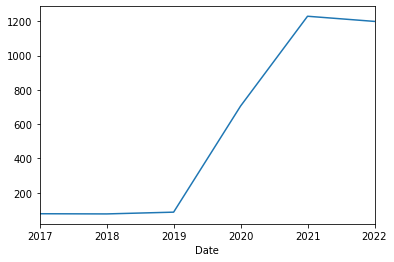

In [586]:
## rule A means year end frequency
df.resample(rule='A').max()['Adj Close'].plot()

<AxesSubplot:xlabel='Date'>

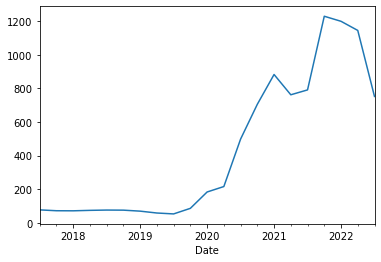

In [587]:
## quauterly start frequency
df.resample(rule='QS').max()['Adj Close'].plot()

<AxesSubplot:xlabel='Date'>

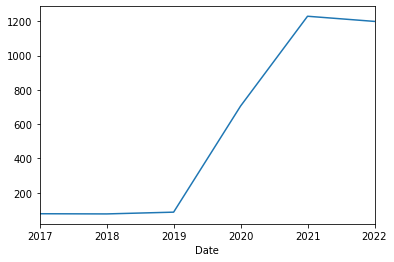

In [588]:
## Business end frequency
df.resample(rule='BA').max()['Adj Close'].plot()

<AxesSubplot:xlabel='Date'>

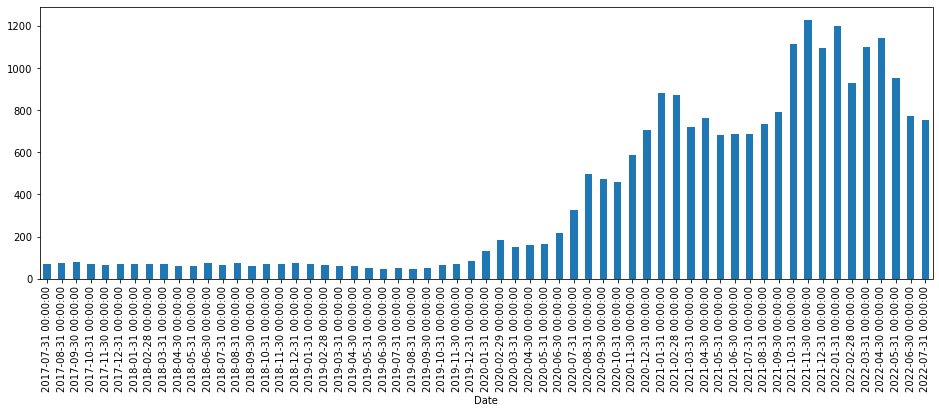

In [589]:
## monthly
df['Adj Close'].resample(rule='M').max().plot(kind='bar',figsize=(16,5))

In [590]:
nov_2021_df = pd.DataFrame(df['Adj Close'].resample(rule='D').max().dropna())
#nov_2021_df['High:Rollingmean']=nov_2021_df['High'].rolling(15).mean() 

In [591]:
#nov_2021_df.drop(columns=['Adj Close'],axis=1,inplace=True)

In [592]:
nov_2021_df

,Adj Close
Date,
2017-07-17,63.914001
2017-07-18,65.648003
2017-07-19,65.052002
2017-07-20,65.984001
2017-07-21,65.680000
...,...
2022-07-11,703.030029
2022-07-12,699.210022
2022-07-13,711.119995


<AxesSubplot:xlabel='Date'>

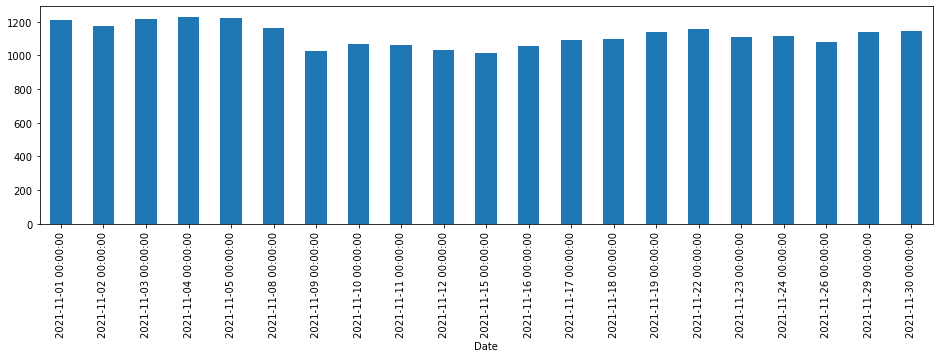

In [593]:
#Find the highest value on which day -Nov 04 2021 - checked in news as well
nov_2021_df.loc['2021-11-01':'2021-11-30']['Adj Close'].plot(kind='bar', figsize=(16,4))

639.2999877929688


<AxesSubplot:xlabel='Date'>

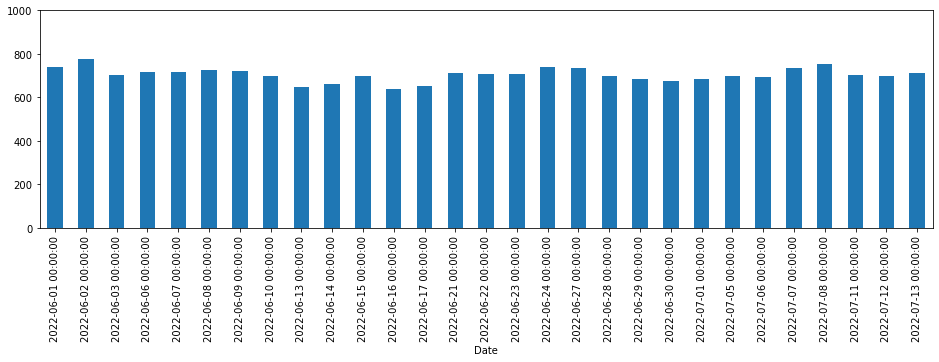

In [594]:
#Find the highest value on which day -Nov 04 2021 - checked in news as well
print(nov_2021_df.loc['2022-06-01':'2022-07-13']['Adj Close'].min())
nov_2021_df.loc['2022-06-01':'2022-07-13']['Adj Close'].plot(kind='bar',ylim=[0,1000], figsize=(16,4))

# Rolling and Expanding

In [595]:
#we are calculating rolling mean 
#the value 5 means - calculate mean of first 5 high values as mean1
#then skip the first and take 5 values to calculate next mean - mean2
#then skip first 2 and calculate next mean3 and so on
# so when window is 5, first 4 values wil not have mean , it starts to calculate after it.
#this is also called Simple Moving average
df['Adj Close'].rolling(5).mean() 


Date
2017-07-17           NaN
2017-07-18           NaN
2017-07-19           NaN
2017-07-20           NaN
2017-07-21     65.255602
                 ...    
2022-07-11    716.670007
2022-07-12    716.672009
2022-07-13    719.856006
2022-07-14    716.118005
2022-07-15    709.700012
Name: Adj Close, Length: 1259, dtype: float64

In [596]:
df['Adj Close:30 days rolling']=df['Adj Close'].rolling(30).mean() 

<AxesSubplot:xlabel='Date'>

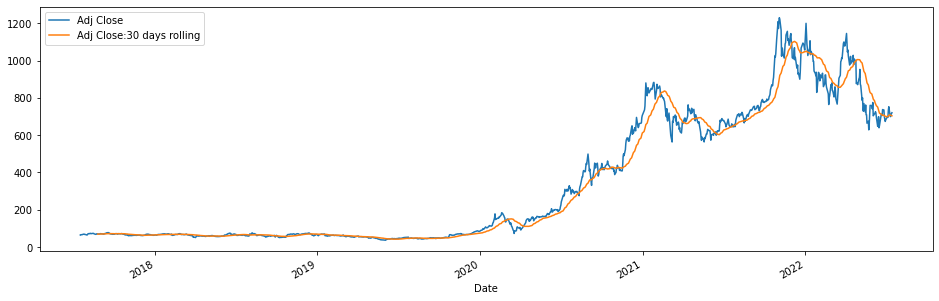

In [597]:
#smoothening the line
df[['Adj Close','Adj Close:30 days rolling']].plot(figsize=(16,5))

In [598]:
d3 = pd.DataFrame(df_DogeCoin['Adj Close'])

In [599]:
#we will have to scale this data to display together

d1=pd.DataFrame(df['Adj Close'])
d1['Adj Close']=d1['Adj Close'].rolling(window=30,min_periods=1).mean() 
d1.rename(columns = {'Adj Close':'Adj Close'}, inplace=True)

d2= pd.DataFrame(df_twitter['Adj Close'])
d2['Adj Close']=d2['Adj Close'].rolling(window=30,min_periods=1).mean() 
d2.rename(columns = {'Adj Close':'Twitter_Adj Close'},inplace=True)
d3.dropna(inplace=True)

d3 = pd.DataFrame(df_DogeCoin['Adj Close'])
#d3['High']=d3['High'].rolling(30).mean() 
d3.rename(columns= {'Adj Close':'Doge Coin Adj Close'},inplace=True)

combine_df = pd.concat([d1,d2,d3],axis=1) 
combine_df

,Adj Close,Twitter_Adj Close,Doge Coin Adj Close
Date,,,
2017-07-17,63.914001,19.940001,NaN
2017-07-18,64.781002,19.960000,NaN
2017-07-19,64.871335,20.013334,NaN
2017-07-20,65.149502,20.142500,NaN
2017-07-21,65.255602,20.136000,NaN
...,...,...,...
2022-07-12,707.529000,38.366333,0.060087
2022-07-13,705.912000,38.252333,0.061953
2022-07-14,704.467999,38.142000,0.062394


<AxesSubplot:xlabel='Date'>

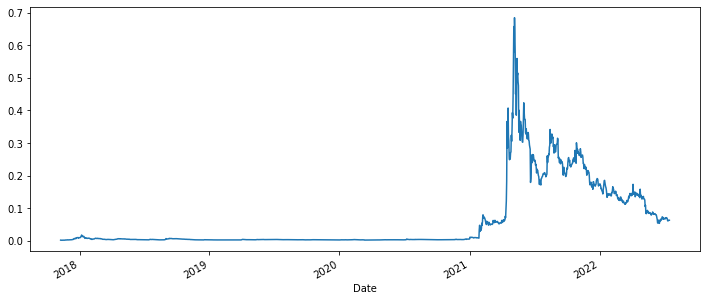

In [600]:
df_DogeCoin['Adj Close'].plot(figsize=(12,5))

<AxesSubplot:xlabel='Date'>

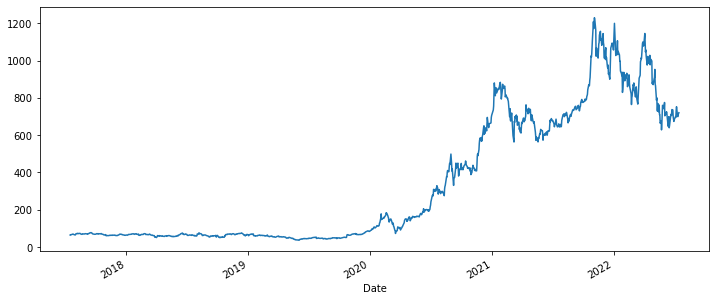

In [601]:
df_tesla=df
df_tesla['Adj Close'].plot(figsize=(12,5))

<AxesSubplot:xlabel='Date'>

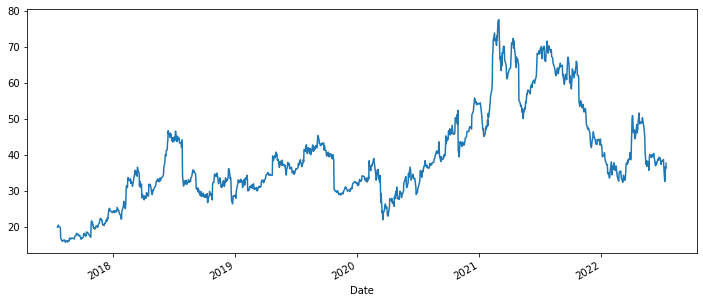

In [602]:
df_twitter['Adj Close'].plot(figsize=(12,5))

In [603]:
 df_Tesla_forscaling = pd.DataFrame(df["Adj Close"])

In [616]:
df_Tesla_forscaling

,Date,Adj Close
0,2017-07-17,63.914001
1,2017-07-18,65.648003
2,2017-07-19,65.052002
3,2017-07-20,65.984001
4,2017-07-21,65.680000
...,...,...
1254,2022-07-11,703.030029
1255,2022-07-12,699.210022
1256,2022-07-13,711.119995
1257,2022-07-14,714.940002


<AxesSubplot:xlabel='Date'>

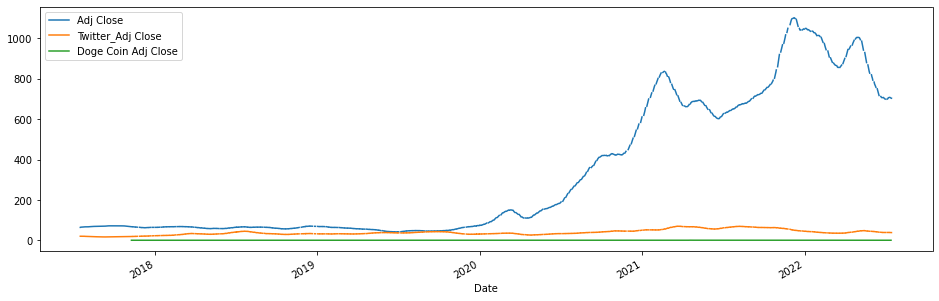

In [604]:
#this is based on simple moving average
#this data need to be scaled
combine_df[['Adj Close','Twitter_Adj Close','Doge Coin Adj Close']].plot(figsize=(16,5))

In [621]:
def scaleData(df_Input,column_name):
    ds_sc= StandardScaler().fit(pd.DataFrame(df_Input["Adj Close"]))
    df_Scaled = ds_sc.transform(pd.DataFrame(df_Input["Adj Close"]),copy=True)
    df_Scaled_df = pd.DataFrame(df_Scaled, columns=[column_name])
    df_Scaled_df.index = df_Input.index
    return df_Scaled_df

In [623]:
df_Tesla_Scaled_df = scaleData(df_Tesla,"Tesla Adj Close")

df_Twitter_Scaled_df = scaleData(df_twitter,"Twitter Adj Close")

df_DogeCoin_Scaled_df = scaleData(df_DogeCoin,"DogeCoin Adj Close")

In [626]:
df_DogeCoin_Scaled_df

,DogeCoin Adj Close
Date,
2017-11-09,-0.563645
2017-11-10,-0.566096
2017-11-11,-0.565727
2017-11-12,-0.567312
2017-11-13,-0.565629
...,...
2022-07-11,0.024182
2022-07-12,0.007062
2022-07-13,0.025213


In [627]:
combine_df_scaled = pd.concat([df_Tesla_Scaled_df,df_Twitter_Scaled_df,df_DogeCoin_Scaled_df],axis=1) 
combine_df_scaled

,Tesla Adj Close,Twitter Adj Close,DogeCoin Adj Close
Date,,,
2017-07-17,-0.786402,-1.444015,NaN
2017-07-18,-0.781394,-1.441004,NaN
2017-07-19,-0.783115,-1.430467,NaN
2017-07-20,-0.780424,-1.399608,NaN
2017-07-21,-0.781302,-1.431220,NaN
...,...,...,...
2022-07-12,1.048093,-0.381268,0.007062
2022-07-13,1.082485,-0.178804,0.025213
2022-07-14,1.093515,-0.213426,0.029502


<AxesSubplot:xlabel='Date'>

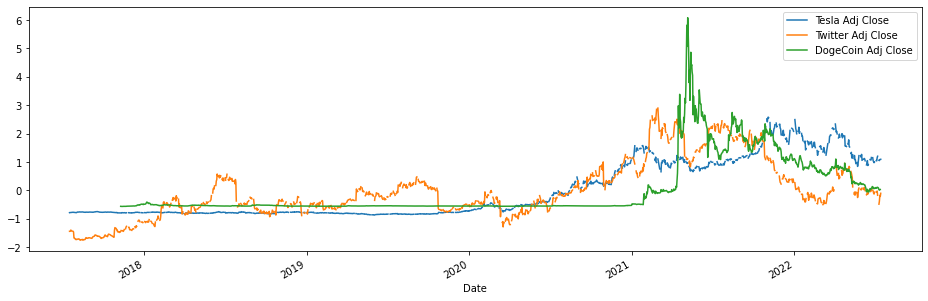

In [628]:
combine_df_scaled[['Tesla Adj Close','Twitter Adj Close','DogeCoin Adj Close']].plot(figsize=(16,5))

<AxesSubplot:xlabel='Date'>

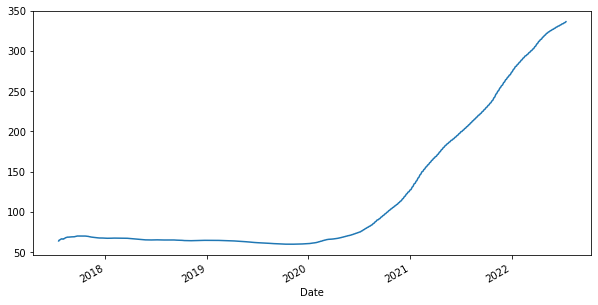

In [629]:
#Cummulative moving average
df_tesla['Adj Close'].expanding().mean().plot(figsize=(10,5))

In [630]:
#exponencial moving average
df_tesla['emw0.2']=df_tesla['Adj Close'].ewm(alpha=0.2,adjust=False).mean()
df_tesla['emw0.4']=df_tesla['Adj Close'].ewm(alpha=0.4,adjust=False).mean()
df_tesla['emw_span5']=df_tesla['Adj Close'].ewm(span=2,).mean()

<AxesSubplot:xlabel='Date'>

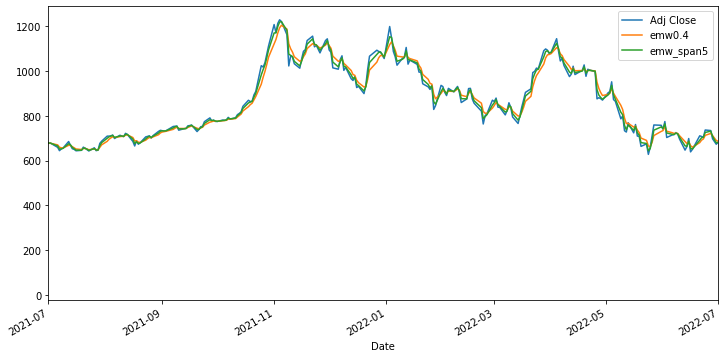

In [631]:
df_tesla[['Adj Close','emw0.4','emw_span5']].plot(xlim=['2021-07-01','2022-07-01'],figsize=(12,6))

<AxesSubplot:xlabel='Date'>

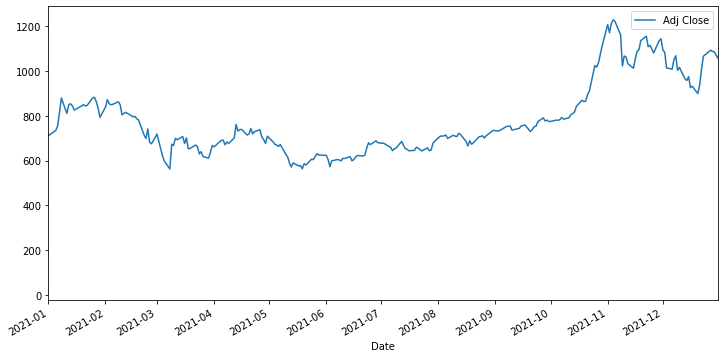

In [638]:
df_tesla[['Adj Close']].plot(xlim=['2021-01-01','2021-12-31'],figsize=(12,6))

# need to find for explonential weighted ewma

In [633]:
df_arima = pdr.get_data_yahoo('TSLA')

In [634]:
df_arima.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [635]:
df_arima

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-17,65.419998,62.689999,65.108002,63.914001,49384500.0,63.914001
2017-07-18,65.825996,63.132000,63.500000,65.648003,31868500.0,65.648003
2017-07-19,66.330002,64.643997,65.646004,65.052002,31785000.0,65.052002
2017-07-20,66.043999,64.839996,65.379997,65.984001,25831000.0,65.984001
2017-07-21,66.251999,65.160004,65.891998,65.680000,24508000.0,65.680000
...,...,...,...,...,...,...
2022-07-11,759.190002,700.880005,756.309998,703.030029,33080400.0,703.030029
2022-07-12,719.320007,685.109985,710.539978,699.210022,29310300.0,699.210022
2022-07-13,726.179993,675.099976,676.500000,711.119995,32651500.0,711.119995


In [636]:
df_arima.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-07-17 to 2022-07-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1259 non-null   float64
 1   Low        1259 non-null   float64
 2   Open       1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Volume     1259 non-null   float64
 5   Adj Close  1259 non-null   float64
dtypes: float64(6)
memory usage: 68.9 KB


<AxesSubplot:xlabel='Date'>

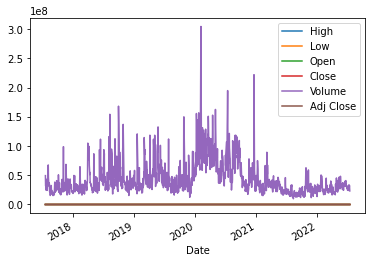

In [637]:
df_arima.plot()

Indicator d 

In [651]:
def adf_test(series):
    results = adfuller(series)
    print('ADF statistics: {}'.format(results[0]))
    print('P value: {}'.format(results[1]))
    if results[1] < 0.05:
        print("Ho Rejected - data is stationary")
    else:    
        print("Ho Accepted- data is not stationary")

In [652]:
adf_test(df_arima['Adj Close'])

ADF statistics: -0.8489735040383124
P value: 0.8043117015792318
Ho Accepted- data is not stationary


In [653]:
df_arima['Adj Close_first_diff']=df_arima['Adj Close']-df_arima['Adj Close'].shift(1)

In [654]:
df_arima['Adj Close_seasonal_diff']=df_arima['Adj Close']-df_arima['Adj Close'].shift(12)

In [655]:
df_arima

,High,Low,Open,Close,Volume,Adj Close,Adj Close_first_diff,Adj Close_seasonal_diff
Date,,,,,,,,
2017-07-17,65.419998,62.689999,65.108002,63.914001,49384500.0,63.914001,NaN,NaN
2017-07-18,65.825996,63.132000,63.500000,65.648003,31868500.0,65.648003,1.734001,NaN
2017-07-19,66.330002,64.643997,65.646004,65.052002,31785000.0,65.052002,-0.596001,NaN
2017-07-20,66.043999,64.839996,65.379997,65.984001,25831000.0,65.984001,0.931999,NaN
2017-07-21,66.251999,65.160004,65.891998,65.680000,24508000.0,65.680000,-0.304001,NaN
...,...,...,...,...,...,...,...,...
2022-07-11,759.190002,700.880005,756.309998,703.030029,33080400.0,703.030029,-49.259949,-5.229980
2022-07-12,719.320007,685.109985,710.539978,699.210022,29310300.0,699.210022,-3.820007,-6.000000
2022-07-13,726.179993,675.099976,676.500000,711.119995,32651500.0,711.119995,11.909973,-26.000000


In [643]:
adf_test(df_arima['Adj Close_first_diff'].dropna())

ADF statistics: -6.599011651967037
P value: 6.810066648567313e-09
Ho Rejected - data is stationary


In [130]:
#!pip install pmdarima

In [169]:
ndiffs(df_arima["Adj Close"],test='adf')

1

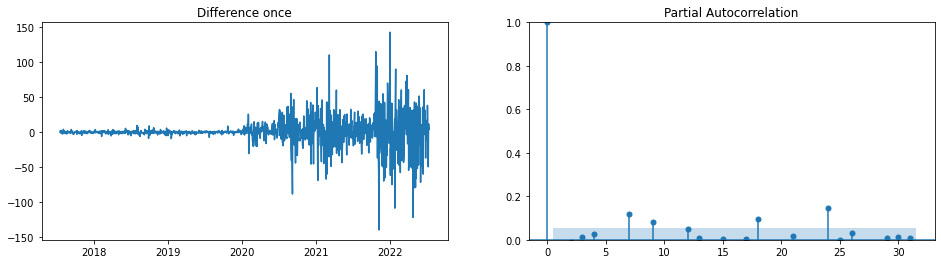

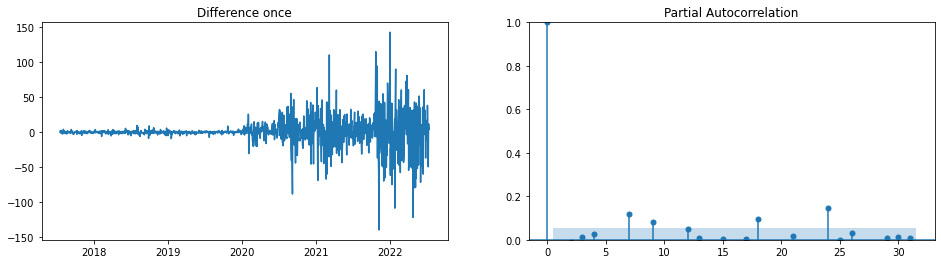

In [644]:
diff= df_arima["Adj Close"].diff().dropna()
fig,(ax1,ax2)=plt.subplots(1, 2, figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2)
#p=4

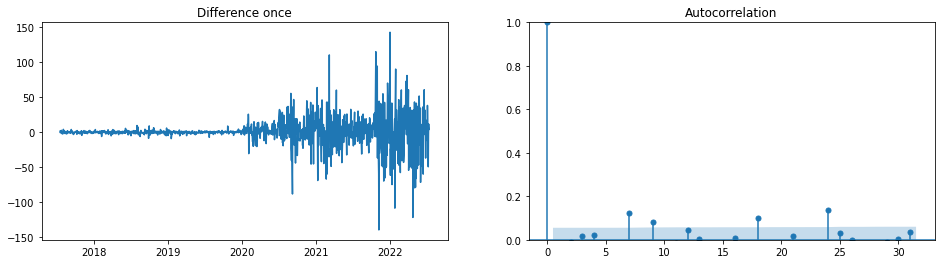

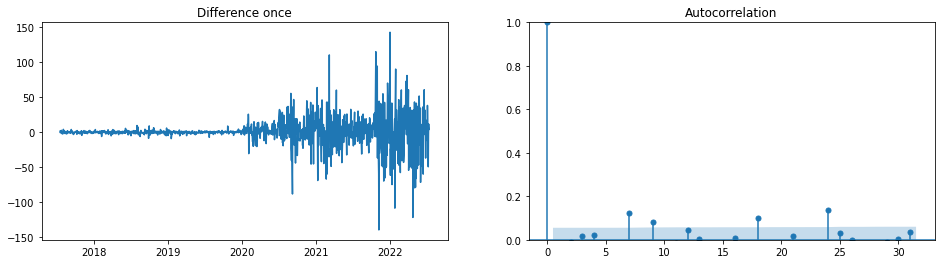

In [645]:
diff= df_arima["Adj Close"].diff().dropna()
fig,(ax1,ax2)=plt.subplots(1, 2, figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_acf(diff, ax=ax2)
#q=4

Other ways

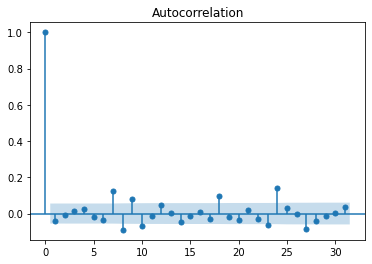

In [646]:
acf = plot_acf(df_arima['Adj Close_first_diff'].dropna())
#q=2

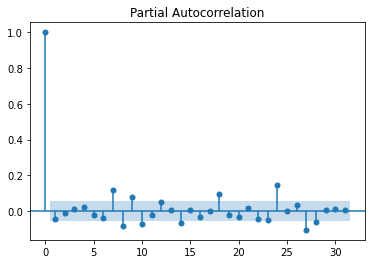

In [647]:
pacf = plot_pacf(df_arima['Adj Close_first_diff'].dropna())
#p=2

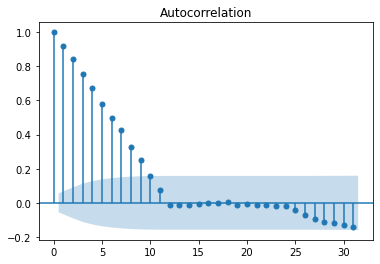

In [648]:
acf1 = plot_acf(df_arima['Adj Close_seasonal_diff'].dropna())
#q=2

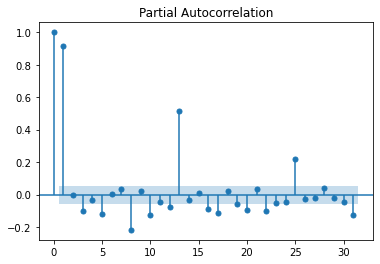

In [649]:
pacf1 = plot_pacf(df_arima['Adj Close_seasonal_diff'].dropna())
#p=2

One more way to find p,d,q- using Auto_arima

In [656]:
stepwise_fit = auto_arima(df_arima["Adj Close"],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.76 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11036.835, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11036.549, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11036.510, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11035.743, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11038.482, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.228 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1259
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -5516.871
Date:                Fri, 15 Jul 2022   AIC                          11035.743
Time:                        20:39:12   BIC                          11040.880
Sample:                             0   HQIC                         11037.673
                               - 1259                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       377.2799      5.882     64.142      0.000     365.751     388.808
===================================================================================
Ljung-Box (L1) (Q):                   2.29   Jarque-Bera (JB):              6480.02
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):             246.15   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [657]:
df_arima

,High,Low,Open,Close,Volume,Adj Close,Adj Close_first_diff,Adj Close_seasonal_diff
Date,,,,,,,,
2017-07-17,65.419998,62.689999,65.108002,63.914001,49384500.0,63.914001,NaN,NaN
2017-07-18,65.825996,63.132000,63.500000,65.648003,31868500.0,65.648003,1.734001,NaN
2017-07-19,66.330002,64.643997,65.646004,65.052002,31785000.0,65.052002,-0.596001,NaN
2017-07-20,66.043999,64.839996,65.379997,65.984001,25831000.0,65.984001,0.931999,NaN
2017-07-21,66.251999,65.160004,65.891998,65.680000,24508000.0,65.680000,-0.304001,NaN
...,...,...,...,...,...,...,...,...
2022-07-11,759.190002,700.880005,756.309998,703.030029,33080400.0,703.030029,-49.259949,-5.229980
2022-07-12,719.320007,685.109985,710.539978,699.210022,29310300.0,699.210022,-3.820007,-6.000000
2022-07-13,726.179993,675.099976,676.500000,711.119995,32651500.0,711.119995,11.909973,-26.000000


# Fitting the Model and Predicting

In [660]:
train_dataset_end=datetime(2021,7,31)
test_dataset_end=datetime(2022,7,31)

In [661]:
train_data=df_arima[:train_dataset_end]
test_data=df_arima[train_dataset_end+timedelta(days=1):test_dataset_end]

In [662]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

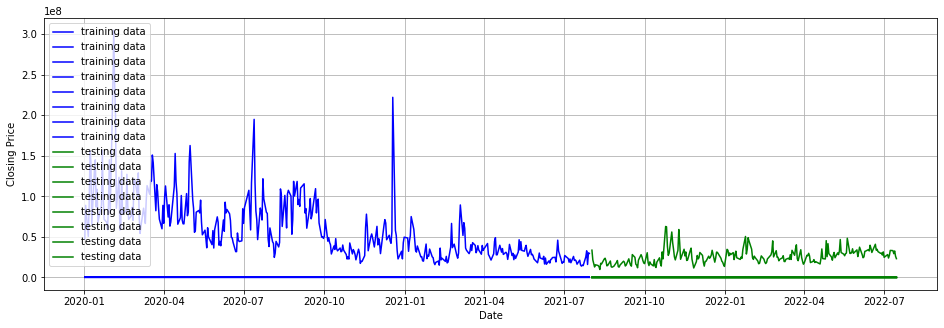

In [663]:
startdate=datetime(2020,1,1)
plt.figure(figsize=(16,5))
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.plot(train_data[startdate:],'blue', label="training data")
plt.plot(test_data, 'green' , label="testing data")
plt.legend(loc="upper left")

In [664]:
test_data

,High,Low,Open,Close,Volume,Adj Close,Adj Close_first_diff,Adj Close_seasonal_diff
Date,,,,,,,,
2021-08-02,726.940002,698.400024,700.000000,709.669983,33615800.0,709.669983,22.469971,59.070007
2021-08-03,722.650024,701.010010,719.000000,709.739990,21620300.0,709.739990,0.070007,65.520020
2021-08-04,724.900024,708.929993,711.000000,710.919983,17002600.0,710.919983,1.179993,64.700012
2021-08-05,720.950012,711.409973,716.000000,714.630005,12919600.0,714.630005,3.710022,54.130005
2021-08-06,716.330017,697.630005,711.900024,699.099976,15623000.0,699.099976,-15.530029,43.809998
...,...,...,...,...,...,...,...,...
2022-07-11,759.190002,700.880005,756.309998,703.030029,33080400.0,703.030029,-49.259949,-5.229980
2022-07-12,719.320007,685.109985,710.539978,699.210022,29310300.0,699.210022,-3.820007,-6.000000
2022-07-13,726.179993,675.099976,676.500000,711.119995,32651500.0,711.119995,11.909973,-26.000000


# create a ARIMA model


In [666]:
train_data

,High,Low,Open,Close,Volume,Adj Close,Adj Close_first_diff,Adj Close_seasonal_diff
Date,,,,,,,,
2017-07-17,65.419998,62.689999,65.108002,63.914001,49384500.0,63.914001,NaN,NaN
2017-07-18,65.825996,63.132000,63.500000,65.648003,31868500.0,65.648003,1.734001,NaN
2017-07-19,66.330002,64.643997,65.646004,65.052002,31785000.0,65.052002,-0.596001,NaN
2017-07-20,66.043999,64.839996,65.379997,65.984001,25831000.0,65.984001,0.931999,NaN
2017-07-21,66.251999,65.160004,65.891998,65.680000,24508000.0,65.680000,-0.304001,NaN
...,...,...,...,...,...,...,...,...
2021-07-26,668.200012,647.109985,650.969971,657.619995,25336600.0,657.619995,14.239990,4.809998
2021-07-27,666.500000,627.239990,663.400024,644.780029,32813300.0,644.780029,-12.839966,-12.169983
2021-07-28,654.969971,639.400024,647.000000,646.979980,16006600.0,646.979980,2.199951,-38.720032


In [708]:
model_ARIMA=sm.tsa.arima.ARIMA(train_data['Adj Close'],order=(2,1,2))

C:\Users\15125\anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  inferred_freq = True
C:\Users\15125\anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  inferred_freq = True
C:\Users\15125\anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  inferred_freq = True


In [709]:
model_ARIMA_fit = model_ARIMA.fit()

In [710]:
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 1018
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -4009.691
Date:                Fri, 15 Jul 2022   AIC                           8029.382
Time:                        20:56:28   BIC                           8054.005
Sample:                             0   HQIC                          8038.733
                               - 1018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0141      0.017     -0.838      0.402      -0.047       0.019
ar.L2         -0.9859      0.016    -61.042      0.000      -1.018      -0.954
ma.L1          0.0242      0.020      1.222      0.222      -0.015       0.063
ma.L2          0.9780      0.019     50.677      0.000       0.940       1.016
sigma2       154.5047      2.541     60.816      0.000     149.525     159.484
===================================================================================
Ljung-Box (L1) (Q):                   7.30   Jarque-Bera (JB):              8678.50
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):             111.09   Skew:                             0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\15125\anaconda3\envs\PythonData\lib\site-packages\statsmodels\stats\diagnostic.py:531: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  cov_kwargs : dict, default None
C:\Users\15125\anaconda3\envs\PythonData\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  -----


<AxesSubplot:>

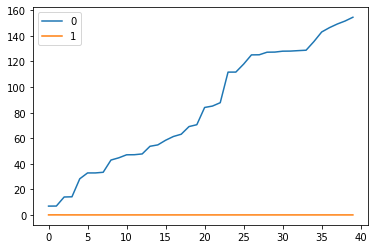

In [711]:
#the modified Box-Pierce test, tests that the errors are white noise.
from statsmodels.stats.diagnostic import acorr_ljungbox
jlung = acorr_ljungbox(model_ARIMA_fit.resid)
pd.DataFrame(jlung).transpose().plot()


(array([4.93095038e-05, 1.97238015e-04, 7.39642557e-04, 3.15580824e-03,
        4.11241261e-02, 3.50097477e-03, 1.13411859e-03, 2.46547519e-04,
        0.00000000e+00, 4.93095038e-05]),
 array([-89.04902248, -69.12754293, -49.20606338, -29.28458383,
         -9.36310428,  10.55837527,  30.47985482,  50.40133437,
         70.32281392,  90.24429348, 110.16577303]),
 <BarContainer object of 10 artists>)

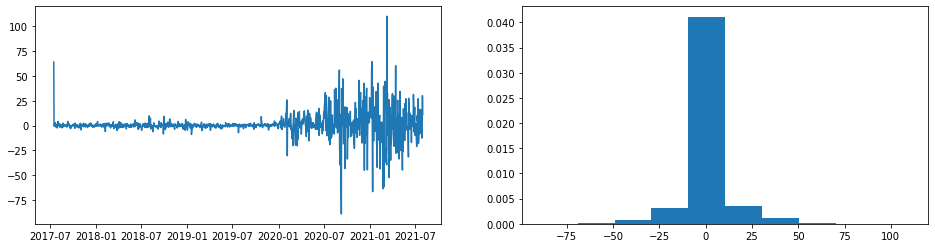

In [712]:
resids = pd.DataFrame(model_ARIMA_fit.resid)
fig, (ax1, ax2) = plt.subplots(1 ,2, figsize=(16,4))
ax1.plot(resids)
ax2.hist(resids, density=True)

<AxesSubplot:ylabel='Density'>

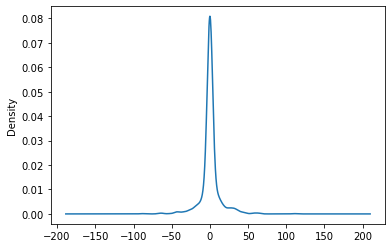

In [713]:
model_ARIMA_fit.resid.plot(kind='kde')

In [714]:
##prediction
pred_start_date=pd.to_datetime(test_data.index[0])
pred_end_date=pd.to_datetime(test_data.index[-1])
print(pred_start_date)
print(pred_end_date)

2021-08-02 00:00:00
2022-07-15 00:00:00


## from statsmodels.graphics.tsaplots import plot_predict
arima_pred =model_ARIMA_fit.predict(start=len(train_data),end=(len(train_data) + len(test_data)-1))
residuals = test_data['Adj Close']-arima_pred
plot_predict(model_ARIMA_fit, start=1, end=60,dynamic=False)


In [565]:
#fig, (ax1, ax2) = plt.subplots(1 ,2, figsize=(16,4))
#ax1.plot(residuals)
#ax2.hist(residuals, density=True)

# Forecasting 

In [715]:

step = 30
fc = model_ARIMA_fit.forecast(step)
df_fc = list(fc)
df_fc

C:\Users\15125\anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  # Handle slices (if the given index keys cover more than one date)


[686.8012405524343,
 687.940296805907,
 688.3173610642773,
 687.1890578295912,
 686.8332428104734,
 687.9506448231698,
 688.2856643860118,
 687.1793033010744,
 686.864629843751,
 687.9598186101003,
 688.2545908256183,
 687.1706976344386,
 686.8953863355564,
 687.9678686503637,
 688.2241547709885,
 687.1631908554033,
 686.9254988065169,
 687.97484440322,
 688.1943688130683,
 687.1567340250015,
 686.9549555342304,
 687.9807942824254,
 688.1652438253884,
 687.1512792592586,
 686.9837464745787,
 687.9857656379417,
 688.1367890418986,
 687.1467797461257,
 687.0118631847525,
 687.989804740328]

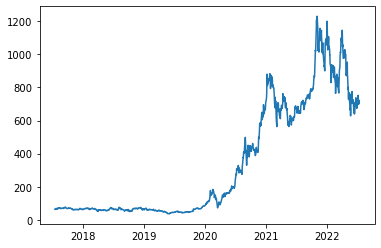

In [716]:
forecast = pd.DataFrame(fc,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(df_arima["Adj Close"], label='Adj Close value')
#plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

In [717]:
# summarize confidence intervals
result = model_ARIMA_fit.get_forecast()
forecast = result.predicted_mean
intervals = [0.2, 0.1, 0.05, 0.01]
for a in intervals:
    ci = result.conf_int(alpha=a)
    print(ci.values[0][0])
    #print(a)
    print('%.1f%% Confidence Interval: %.3f between %.3f and %.3f' % ((1-a)*100, forecast, ci.values[0,0], ci.values[0,1]))

670.8715665304932
80.0% Confidence Interval: 686.801 between 670.872 and 702.731
666.3557252914
90.0% Confidence Interval: 686.801 between 666.356 and 707.247
662.4389064818577
95.0% Confidence Interval: 686.801 between 662.439 and 711.164
654.7837063034235
99.0% Confidence Interval: 686.801 between 654.784 and 718.819


C:\Users\15125\anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  # Handle slices (if the given index keys cover more than one date)


In [718]:
result.conf_int(alpha=0.2)

,lower Adj Close,upper Adj Close
1018,670.871567,702.730915


In [719]:
lower = pd.Series(result.conf_int(alpha=0.2)["lower Adj Close"])
upper = pd.Series(result.conf_int(alpha=0.2)["upper Adj Close"])

In [720]:
test_data.index

DatetimeIndex(['2021-08-02', '2021-08-03', '2021-08-04', '2021-08-05',
               '2021-08-06', '2021-08-09', '2021-08-10', '2021-08-11',
               '2021-08-12', '2021-08-13',
               ...
               '2022-07-01', '2022-07-05', '2022-07-06', '2022-07-07',
               '2022-07-08', '2022-07-11', '2022-07-12', '2022-07-13',
               '2022-07-14', '2022-07-15'],
              dtype='datetime64[ns]', name='Date', length=241, freq=None)

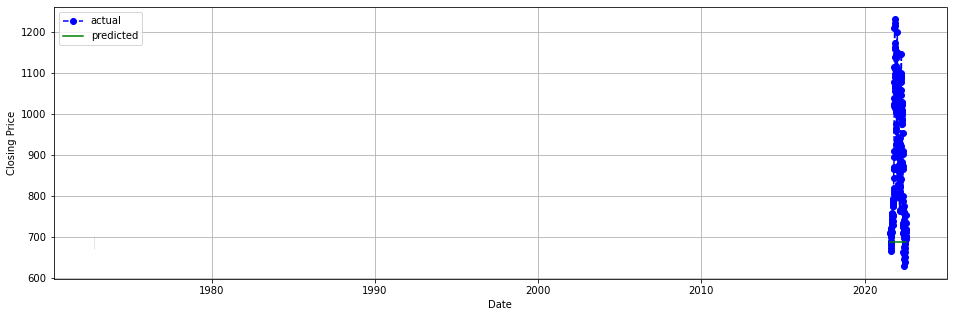

In [721]:
test_data_list = list(test_data["Adj Close"])
arima_pred_list =list(arima_pred)
data_range = test_data.index
plt.figure(figsize=(16,5))
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.plot(data_range,test_data_list,color='blue', marker='o',linestyle='--', label="actual")
plt.plot(data_range,arima_pred_list,color='green', label="predicted")
plt.fill_between(lower.index, lower, upper, color='k', alpha=0.1)
plt.title="Forecast vs Actual"
plt.legend(loc="upper left")

In [722]:
test_data

,High,Low,Open,Close,Volume,Adj Close,Adj Close_first_diff,Adj Close_seasonal_diff
Date,,,,,,,,
2021-08-02,726.940002,698.400024,700.000000,709.669983,33615800.0,709.669983,22.469971,59.070007
2021-08-03,722.650024,701.010010,719.000000,709.739990,21620300.0,709.739990,0.070007,65.520020
2021-08-04,724.900024,708.929993,711.000000,710.919983,17002600.0,710.919983,1.179993,64.700012
2021-08-05,720.950012,711.409973,716.000000,714.630005,12919600.0,714.630005,3.710022,54.130005
2021-08-06,716.330017,697.630005,711.900024,699.099976,15623000.0,699.099976,-15.530029,43.809998
...,...,...,...,...,...,...,...,...
2022-07-11,759.190002,700.880005,756.309998,703.030029,33080400.0,703.030029,-49.259949,-5.229980
2022-07-12,719.320007,685.109985,710.539978,699.210022,29310300.0,699.210022,-3.820007,-6.000000
2022-07-13,726.179993,675.099976,676.500000,711.119995,32651500.0,711.119995,11.909973,-26.000000


In [725]:
mape = np.mean(np.abs(np.array(fc[:1])-np.array(test_data_list))/np.abs(test_data_list))
print("MAPE: " + str(mape))
#MEAN ABSOLUTE PERCENTAGE ERROR (MAPE) = 19.79% mean this model as performed Good

MAPE: 0.19798675851991887
